In [11]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2440 - acc: 0.9249 - val_loss: 0.1025 - val_acc: 0.9668
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1039 - acc: 0.9691 - val_loss: 0.0871 - val_acc: 0.9747
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0770 - acc: 0.9772 - val_loss: 0.0830 - val_acc: 0.9774
Epoch 4/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0598 - acc: 0.9818 - val_loss: 0.0871 - val_acc: 0.9746
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0505 - acc: 0.9850 - val_loss: 0.0828 - val_acc: 0.9802
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0468 - acc: 0.9865 - val_loss: 0.0741 - val_acc: 0.9815
Epoch 7/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0384 - acc: 0.9891 - val_loss: 0.0799 - val_acc

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10202159784401092
Test accuracy: 0.9847


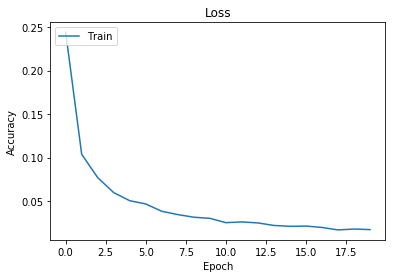

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()